## Query plan drawer

Takes a problem and draws queries for it 

In [175]:
problems = [(2,
  [45, 11, 40, 38],
  {(0, 2): 0, (0, 3): -3, (1, 2): -15, (1, 3): -14})]
  ## HAS 2 FOR AMOUNT OF PLANS ADDED TO THE END
  ### Needs to be adapted for n queries with n_i plans each

In [82]:
import pydot
from IPython.display import SVG
import numpy as np

In [18]:
def add_node(graph, node, label):
    graph.add_node(pydot.Node(node, label=label))

In [21]:
def add_join(graph, node, node_a, node_b):
    graph.add_node(pydot.Node(node, shape="circle", label="⋈"))
    graph.add_edge(pydot.Edge(node, node_a, color="black"))
    graph.add_edge(pydot.Edge(node, node_b, color="black"))
    

In [73]:
def add_edge(graph, node_a, node_b):
    graph.add_edge(pydot.Edge(node_a, node_b, color="black"))

In [25]:
def add_select(graph, node, node_a):
    graph.add_node(pydot.Node(node, shape="circle", label="π"))
    graph.add_edge(pydot.Edge(node, node_a, color="black"))

In [51]:
def create_graph(name, center=True):
    return pydot.Dot(name, graph_type="graph", bgcolor="transparent", label=name, center=center)

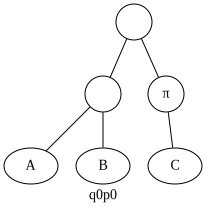

In [185]:
graph = create_graph("q0p0")
add_node(graph, "a", "A")
add_node(graph, "b", "B")
add_join(graph, "jab", "a", "b")
add_node(graph, "c", "C")
add_select(graph, "sc", "c")
add_join(graph, "jjabsc", "jab", "sc")

SVG(graph.create_svg())

In [120]:
problems[0][2]

{(0, 2): -15, (0, 3): -3, (1, 2): -9, (1, 3): -14}

In [187]:
"a" in [a.get_name() for a in graph.get_nodes()]

True

In [207]:
graphs = []
table_factor = 5
for problem in problems:
    pg = []
    for i in range(int(len(problem[1])/problem[0])):
        for j in range(problem[0]):
            pg.append(create_graph(name = "q"+str(i)+"p"+str(j)))
    n_tables = np.amax([int(x/table_factor) for x in problem[1]])
    for j, cost in enumerate(problem[1]):
        if j == 0:
            for n in range(int(cost/n_tables)):
                add_node(pg[j], chr(65+n), chr(65+n)) 
        else:
            print(list(problem[2].keys())[j])
            for a,b in list(problem[2].keys())[j]:
                savings = problem[2][(a, b)]
                if savings == 0:
                    set_tables = 0
                    offset = 0
                    while set_tables < int(cost/n_tables):
                        if not chr(65+offset) in [x.get_name() for x in pg[a].get_nodes()]:
                            add_node(pg[b], chr(65+offset), chr(65+offset))
                            offset += 1
                            set_tables += 1
                        else:
                            offset += 1
                else:
                    set_tables = 0
                    n_equal_tables = int(-savings*2/n_tables)
                    set_equal_tables = 0
                    offset = 0
                    while set_tables < int(cost/n_tables):
                        if chr(65+offset) in [x.get_name() for x in pg[a].get_nodes()]:
                            if set_equal_tables < n_equal_tables:
                                add_node(pg[b], chr(65+offset), chr(65+offset))
                                set_tables += 1
                                set_equal_tables += 1
                            offset += 1
                        else:
                            add_node(pg[b], chr(65+offset), chr(65+offset))
                            set_tables += 1
                            offset += 1


    graphs.append(pg)

(0, 3)


TypeError: cannot unpack non-iterable int object

In [208]:
problems[0]

(2, [45, 11, 40, 38], {(0, 2): 0, (0, 3): -3, (1, 2): -15, (1, 3): -14})

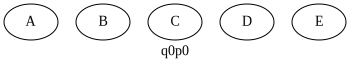

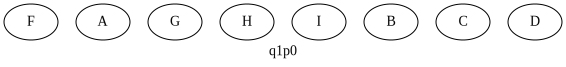

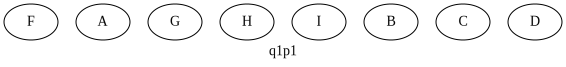

In [204]:
for p in graphs:
    for g in p:
        display(SVG(g.create_svg()))